#  Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a smaller set of uncorrelated variables called principal components while retaining as much information as possible.

 **Why do we use PCA?**

- Reduce complexity in large datasets
- Improve visualization of high-dimensional data
- Avoid overfitting by removing redundant features
- Speed up machine learning algorithms

### 1. Building Blocks of PCA

PCA works by transforming data into new coordinate axes where:

- First Principal Component (PC1) captures the maximum variance.
- Second Principal Component (PC2) captures the second most variance, orthogonal to PC1.
- Additional principal components capture decreasing amounts of variance.

**Mathematical Concepts Behind PCA:**

- Mean centering the data
- Computing covariance matrix to measure feature relationships
- Eigenvalues & Eigenvectors determine the principal components
- Selecting top-k components based on explained variance


### 2. How PCA Works (Finding Principal Components)

**Standardize the Data**
- Since PCA is sensitive to scale, we normalize the features.

**Compute Covariance Matrix**
- Find relationships between different features to understand how they vary together.

**Compute Eigenvalues & Eigenvectors**
- Eigenvectors define the direction of principal components, and eigenvalues determine their magnitude.

**Select Principal Components**
- Choose the top-k components that explain most of the variance.

**Transform the Data**
- Project the original data onto these new axes.

### 4. Use Cases of PCA


- Customer Segmentation – Reducing customer data dimensions for clustering
- Face Recognition – Compressing images while retaining key features
- Stock Market Analysis – Identifying principal factors affecting stocks
- Medical Diagnosis – Reducing gene expression data for analysis



PCA is a powerful tool for dimensionality reduction and helps in improving visualization & machine learning model performance by removing redundant features.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine


- numpy → Handles numerical operations
- pandas → Manages datasets
- matplotlib.pyplot → Creates visualizations
- sklearn.decomposition.PCA → Implements PCA
- sklearn.preprocessing.StandardScaler → Standardizes data
- sklearn.datasets.load_wine → Loads a sample dataset for demonstration

In [91]:
#load dataset

In [94]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)


**What happens here?**

- We use the Wine dataset, which contains information about different wine chemicals.
- The dataset has 13 features (e.g., alcohol, malic acid, etc.).
- We convert it into a Pandas DataFrame for easy manipulation.

In [104]:
#Standardize the Data

In [106]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**Why do we standardize?**

- PCA is sensitive to scale, meaning features with larger values (e.g., alcohol content) could dominate over smaller ones.
- StandardScaler() normalizes all features to have mean = 0 and variance = 1.

- Before scaling 
Alcohol: [14.23, 13.20, 13.16] (large values)
Ash: [2.43, 2.14, 2.67] (small values

- After Scaling Alcohol: [0.98, -0.34, -0.40]
Ash: [-0.52, -0.76, -0.33]
)


In [116]:
#Apply PCA

In [119]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_pca = pca.fit_transform(df_scaled)


**What happens?** 

- We tell PCA to reduce the dataset from 13 features to 2 principal components.
- PCA finds the best two directions (principal components) that capture most of the variance in the data.

**Convert to DataFrame & Add Target Column**

In [133]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = data.target


**Why?**

- We create a new DataFrame containing the two principal components (PC1, PC2).
- We add the original target labels (wine categories: 0, 1, 2).

 **Visualize the Data**

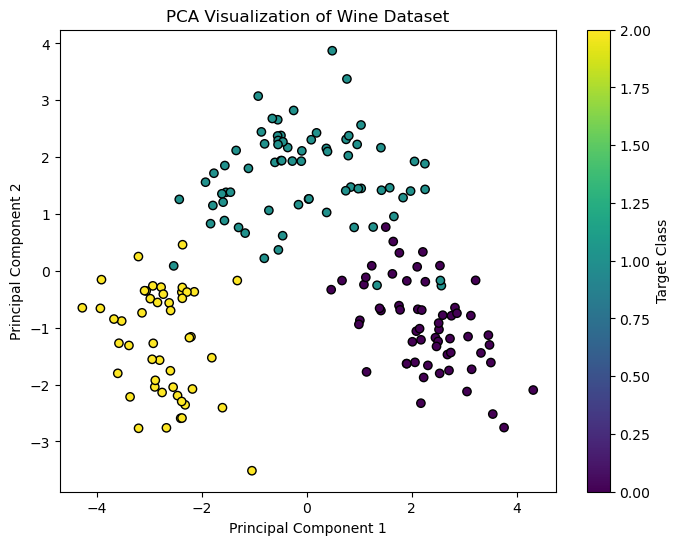

In [139]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Target'], cmap='viridis', edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Wine Dataset")
plt.colorbar(label="Target Class")
plt.show()


**What happens?**

- We plot PC1 vs PC2 to visualize how the wines are grouped.
- c=df_pca['Target'] colors the points based on their class (0, 1, or 2).
- colorbar(label="Target Class") adds a legend for reference.

**Check How Much Variance PCA Captured**


In [148]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.36198848 0.1920749 ]


PCA gives the percentage of variance explained by each principal component.

- PC1 explains 36.19% of the variance
- PC2 explains 19.21% of the variance
- Total variance retained = 55.4%

- PCA reduces dimensions while preserving essential patterns.
- Helps in data visualization and avoiding overfitting.
- The top components explain most of the dataset’s variance.